> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue for the movies listed above.



Analysis Question :

1-	Who are the top twenty actors participating in the market?

2- Who are the top twenty market directors currently active in the industry?

3- Which ten production companies make up the top of the list?

4- What are the top five genres of movies that people watch the most?

5- What about the statistics regarding the profits?

6- Where do we stand with the runtime statistics?

7- What about the average values for (revenue, budget, profit, and runtime)?

8- What about the maximum and minimum values for (runtime), (budget), (profit), and (revenue),      respectively?


In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
##  1- Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


### 1.1 Load Data

In [10]:
movies_data = pd.read_csv("tmdb-movies.csv")
movies_data.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [11]:
movies_data.tail()

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

## 1.2 Carrying out a few processes in order to investigate the data

In [12]:
movies_data.shape

(10866, 21)

#### The number of rows in the file is 10866, and there are 21 columns.

In [13]:
movies_data.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [14]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The revenue column, the budget column, and the runtime column all have values of zero or NAN.

In [15]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The date needs to be changed to reflect the current time in order for it not to be an object.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## 2-  Data Cleaning (Replace this with more specific notes!)

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


### 2.1 Delete unused columns.

In [17]:
new_data = movies_data.copy()

In [18]:
unused_cols = ["id", "imdb_id", "popularity", "homepage","tagline", "overview","keywords","vote_count","budget_adj", "revenue_adj"]

In [19]:
new_data.drop(unused_cols,axis= 1,inplace=True)

In [20]:
new_data.head()

budget     revenue                original_title  \
0  150000000  1513528810                Jurassic World   
1  150000000   378436354            Mad Max: Fury Road   
2  110000000   295238201                     Insurgent   
3  200000000  2068178225  Star Wars: The Force Awakens   
4  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

### 2.2 Delete duplicated rows

In [21]:
new_data.duplicated().sum()

1

In [22]:
new_data.drop_duplicates(inplace = True)

In [23]:
new_data.duplicated().sum()

0

### 2.3 Delete null values

In [24]:
new_data.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

In [25]:
new_data.dropna(inplace = True)

In [26]:
new_data.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

### 2.4 Delete any values that are zero or less than 10 million from the revenue and budget, as well as any values    that are zero for runtime.



In [27]:
k = new_data.query("revenue <= 10000000 or budget <= 10000000")

In [28]:
new_data.drop(k.index, inplace = True)

In [29]:
run_zero = new_data.query("runtime == 0")

In [30]:
new_data.drop(run_zero.index, inplace = True)

In [31]:
new_data.shape

(2534, 11)

Currently, there are 2534 rows in the file, and 11 columns.

### 2.4 Change date column to datetime

In [32]:
new_data["release_date"] = pd.to_datetime(new_data["release_date"])

In [33]:
new_data["release_date"]

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10758   1978-12-14
10762   1978-12-08
10779   1978-06-27
10788   1978-10-24
10835   2066-12-20
Name: release_date, Length: 2534, dtype: datetime64[ns]

### 2.5 Make the numbers representing revenue, budget, and runtime into integers, and add a new column for profit.

In [34]:
integer_values = ["revenue", "budget","runtime"]

In [35]:
new_data[integer_values] = new_data[integer_values].applymap(np.int64)

In [36]:
new_data.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
dtype: object

In [37]:
new_data.insert(2, "profit" , (new_data["revenue"] - new_data["budget"]) )

In [38]:
new_data.head()

budget     revenue      profit                original_title  \
0  150000000  1513528810  1363528810                Jurassic World   
1  150000000   378436354   228436354            Mad Max: Fury Road   
2  110000000   295238201   185238201                     Insurgent   
3  200000000  2068178225  1868178225  Star Wars: The Force Awakens   
4  190000000  1506249360  1316249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In conclusion, there are 2534 rows and 12 columns in the file.

<a id='eda'></a>
## 3 -  Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Who are the top twenty actors participating in the market!)

In [39]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### I will create a function to separate between the actors in the actors column.

In [40]:
def sep_data(column):
    sep_data = new_data[column].str.cat(sep = "|")
    sep_data = pd.DataFrame(list(sep_data.split("|")), columns = [column])
    sep_data.columns = sep_data.columns.str.upper()
    return sep_data

In [41]:
sep_data("cast").value_counts().head(20)

CAST              
Robert De Niro        47
Bruce Willis          39
Samuel L. Jackson     34
Nicolas Cage          34
Johnny Depp           32
Tom Cruise            32
Harrison Ford         31
Denzel Washington     31
Brad Pitt             31
Tom Hanks             30
Matt Damon            30
Eddie Murphy          30
Morgan Freeman        28
Mark Wahlberg         28
Sylvester Stallone    28
Cameron Diaz          26
Owen Wilson           26
Jim Carrey            26
Robin Williams        26
Adam Sandler          26
dtype: int64

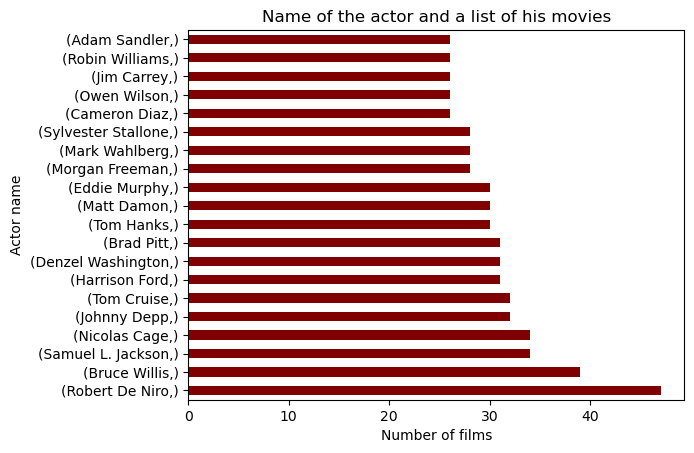

In [42]:
sep_data("cast").value_counts().head(20).plot(kind = "barh" , color = "maroon");
plt.xlabel("Number of films")
plt.ylabel("Actor name")
plt.title("Name of the actor and a list of his movies")
plt.show()

#### In order to create the scatter plot, I will need to edit the DataFrame with the actor's name and the number of films they have appeared in.

In [43]:
actors = sep_data("cast").value_counts().head(20)
actor_v1 = pd.DataFrame(actors)
actor_v1.reset_index(inplace=True)
actor_v1.rename( columns = { actor_v1.columns[0] : "Actor name", actor_v1.columns[1] : "Number of movies"},inplace = True)
actor_v1

Actor name  Number of movies
0       Robert De Niro                47
1         Bruce Willis                39
2    Samuel L. Jackson                34
3         Nicolas Cage                34
4          Johnny Depp                32
5           Tom Cruise                32
6        Harrison Ford                31
7    Denzel Washington                31
8            Brad Pitt                31
9            Tom Hanks                30
10          Matt Damon                30
11        Eddie Murphy                30
12      Morgan Freeman                28
13       Mark Wahlberg                28
14  Sylvester Stallone                28
15        Cameron Diaz                26
16         Owen Wilson                26
17          Jim Carrey                26
18      Robin Williams                26
19        Adam Sandler                26

#### The scatter plot that follows demonstrates the relationship between the number of films and the directors who have helmed them.

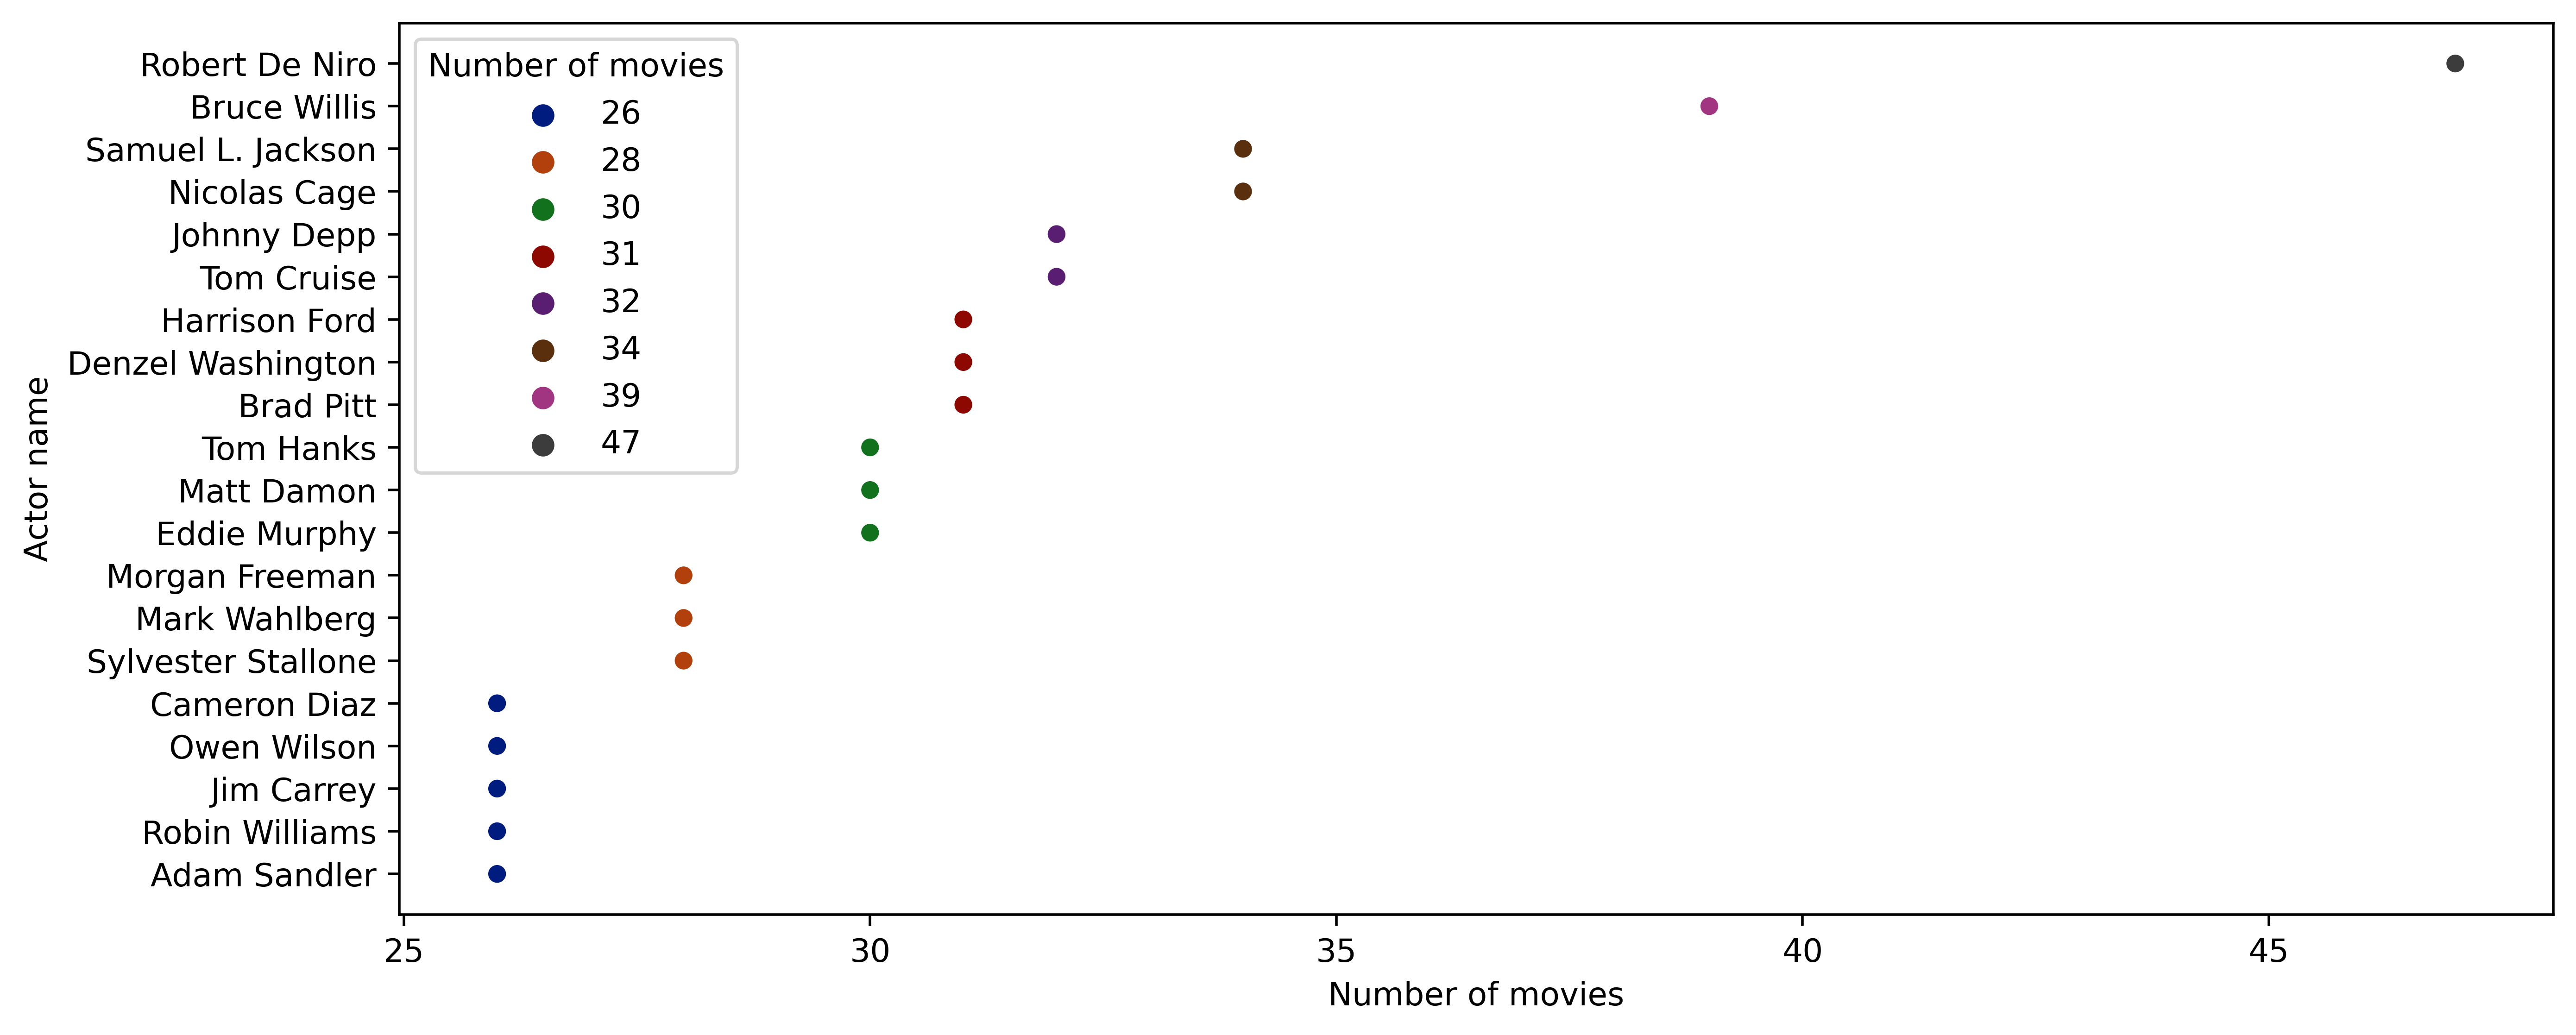

In [44]:
plt.figure(figsize= (12,5) , dpi= 500);
sns.scatterplot( x = "Number of movies" , y = "Actor name" ,data = actor_v1 , hue = "Number of movies" , palette = "dark");

<AxesSubplot:xlabel='Number of movies', ylabel='Actor name'>

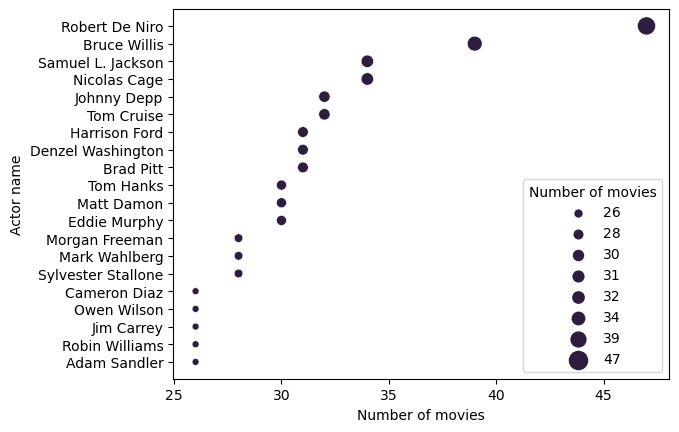

In [45]:
sns.scatterplot(
    data=actor_v1, x="Number of movies", y="Actor name", hue="Number of movies", size="Number of movies",
    sizes=(25, 170), hue_norm=(0, 7), legend="full"
)

#### Robert De Niro is widely considered to be the most accomplished actor of all time (47 movies)

### Research Question 2  (Who are the top twenty market directors currently active in the industry!)

In [46]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions 
#   investigate.


#### I'll use the sep_data function for this question as well.

In [47]:
sep_data("director").value_counts().head(20)

DIRECTOR         
Steven Spielberg     25
Clint Eastwood       21
Ridley Scott         20
Tony Scott           14
Robert Rodriguez     14
Tim Burton           14
Robert Zemeckis      13
Ron Howard           13
Martin Scorsese      12
Oliver Stone         12
Renny Harlin         12
Steven Soderbergh    12
Peter Farrelly       12
Brian De Palma       12
Joel Schumacher      11
Bobby Farrelly       11
Michael Bay          11
Richard Donner       11
Rob Reiner           10
Shawn Levy           10
dtype: int64

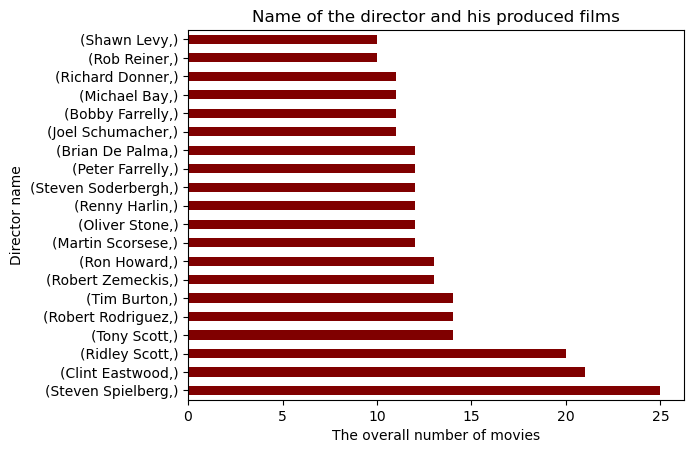

In [48]:
sep_data("director").value_counts().head(20).plot(kind = "barh" , color = "maroon");
plt.xlabel("The overall number of movies")
plt.ylabel("Director name")
plt.title("Name of the director and his produced films")
plt.show()

#### Steven Spielberg is the director of the vast majority of films (25 movies)

#### On average, each of the top twenty directors has directed a total of six different movies over the course of their careers..

### Research Question 3  (Which ten production companies make up the top of the list!)

#### I'll use the sep_data function for this question as well.

In [49]:
sep_data("production_companies").value_counts().head(10)

PRODUCTION_COMPANIES                  
Warner Bros.                              283
Universal Pictures                        263
Paramount Pictures                        212
Twentieth Century Fox Film Corporation    173
Columbia Pictures                         160
New Line Cinema                           125
Walt Disney Pictures                      111
Touchstone Pictures                       101
Relativity Media                           91
Metro-Goldwyn-Mayer (MGM)                  80
dtype: int64

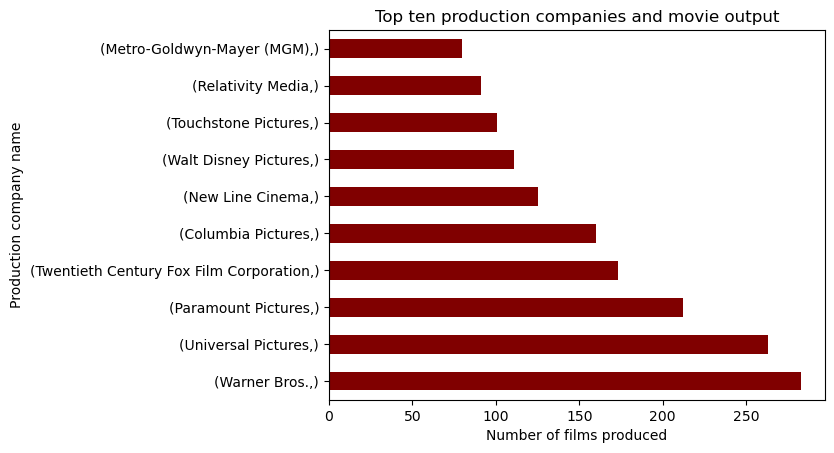

In [50]:
sep_data("production_companies").value_counts().head(10).plot(kind = "barh", color = "maroon");
plt.xlabel("Number of films produced")
plt.ylabel("Production company name")
plt.title("Top ten production companies and movie output")
plt.show()

#### In order to generate the scatter plot, I will need to make some edits to the DataFrame and include the name of each production company as well as the total number of movies that they have created.

In [51]:
Co_v1 = sep_data("production_companies").value_counts().head(10)
Co_v2 = pd.DataFrame(Co_v1)
Co_v2.reset_index(inplace=True)
Co_v2.rename( columns = { Co_v2.columns[0] : "Company name", Co_v2.columns[1] : "Number of movies produced"},inplace = True)
Co_v2

Company name  Number of movies produced
0                            Warner Bros.                        283
1                      Universal Pictures                        263
2                      Paramount Pictures                        212
3  Twentieth Century Fox Film Corporation                        173
4                       Columbia Pictures                        160
5                         New Line Cinema                        125
6                    Walt Disney Pictures                        111
7                     Touchstone Pictures                        101
8                        Relativity Media                         91
9               Metro-Goldwyn-Mayer (MGM)                         80

#### This is a scatter plot that illustrates the connection between the name of the production company and the movies that it has produced.

<AxesSubplot:xlabel='Number of movies produced', ylabel='Company name'>

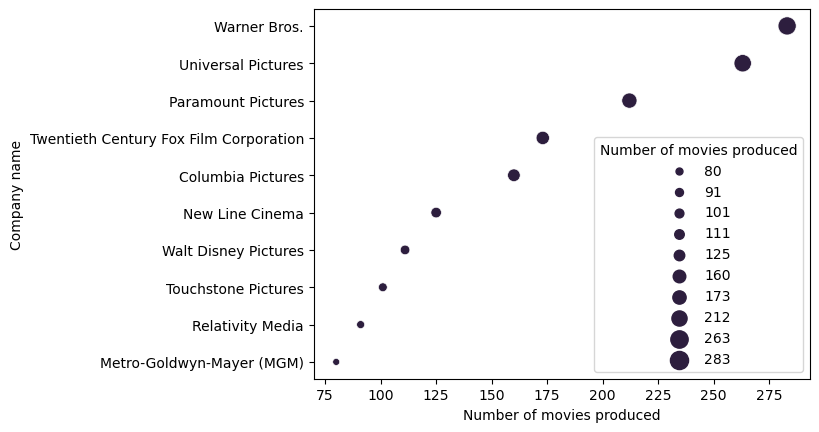

In [52]:
sns.scatterplot(data=Co_v2, x="Number of movies produced", y="Company name", hue="Number of movies produced", 
                size="Number of movies produced",sizes=(25, 170), hue_norm=(0, 7), legend="full")

#### This is a spider diagram that illustrates the connection between the name of the production company and the movies that it has produced.

In [53]:
fig = px.scatter_polar(Co_v2, r="Number of movies produced", theta="Company name",
                       color="Company name", symbol="Number of movies produced", size="Number of movies produced",
                       color_discrete_sequence=px.colors.sequential.Plasma_r);
fig.show()


#### Warner Bros. is the most successful film production company in terms of the number of movies it has produced (283).

### Research Question 4  (What are the top five genres of movies that people watch the most!)

#### I'll use the sep_data function for this question as well.

In [54]:
sep_data("genres")

GENRES
0              Action
1           Adventure
2     Science Fiction
3            Thriller
4              Action
...               ...
7071           Action
7072        Adventure
7073            Drama
7074              War
7075          Romance

[7076 rows x 1 columns]

In [55]:
sep_data("genres")

GENRES
0              Action
1           Adventure
2     Science Fiction
3            Thriller
4              Action
...               ...
7071           Action
7072        Adventure
7073            Drama
7074              War
7075          Romance

[7076 rows x 1 columns]

In [75]:
y= sep_data("genres").value_counts().head(5)
x = pd.DataFrame(y)
x.reset_index(inplace=True)
x.rename( columns = { x.columns[0] : "Generes", x.columns[1] : "Number of movies produced"},inplace = True)
x

Generes  Number of movies produced
0      Drama                       1054
1     Comedy                        909
2     Action                        845
3   Thriller                        794
4  Adventure                        619

In [76]:
fig = px.scatter_polar(x, r="Number of movies produced", theta="Generes",
                       color="Generes", symbol="Number of movies produced", size="Number of movies produced",
                       color_discrete_sequence=px.colors.sequential.Plasma_r);
fig.show()


#### There are a wide variety of film genres ( Drama , Comedy , Action ,Thriller, Adventure).


### Research Question 5  (What about the statistics regarding the profits!)

In [58]:
new_data["profit"].describe()

count    2.534000e+03
mean     1.000954e+08
std      1.758003e+08
min     -4.139124e+08
25%      5.503971e+06
50%      4.518973e+07
75%      1.237433e+08
max      2.544506e+09
Name: profit, dtype: float64

Notes :

1- Twenty-five percent of all films gross less than 5,503,971 dollars.

2- Fifty percent of films have earnings that are lower than 45,189,730 dollars.

3- The majority of movies, approximately 75 percent, make less than 1,237,433,000 dollars.

4- The average amount of profit is 100,095,400 dollars.


#### The following code illustrates the relationship between the number of years of release and profit.

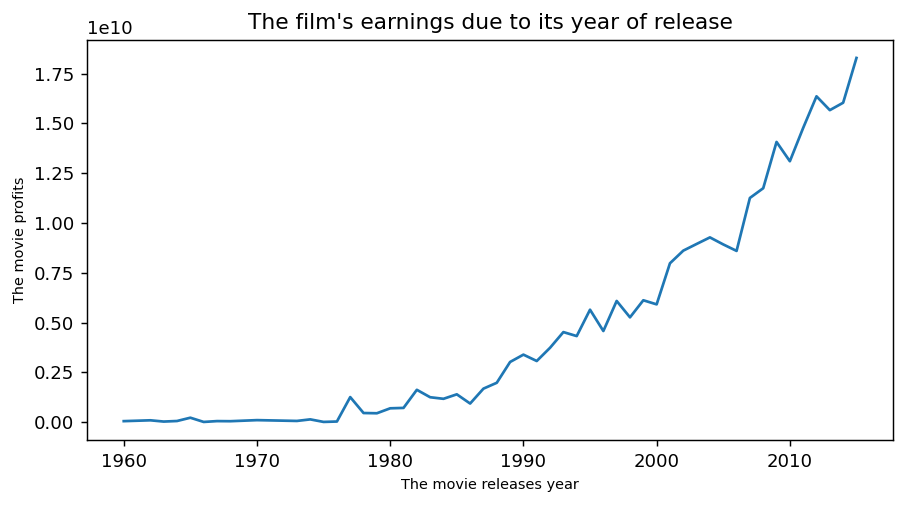

In [59]:
year_profit = new_data.groupby("release_year")["profit"].sum()
plt.figure(figsize=(8,4), dpi = 130)

plt.xlabel('The movie releases year', fontsize = 8)
plt.ylabel('The movie profits', fontsize = 8)
plt.title("The film's earnings due to its year of release")
plt.plot(year_profit)
plt.show()

In [60]:
mo_v2 = pd.DataFrame(year_profit)
mo_v2.reset_index(inplace=True)
mo_v2.rename(columns = { mo_v2.columns[0] : "The movie releases year", mo_v2.columns[1] : "The movie profits"},inplace = True)
mo_v2

The movie releases year  The movie profits
0                      1960           48000000
1                      1962           90000000
2                      1963           26635000
3                      1964           55000000
4                      1965          219917568
5                      1966            8000000
6                      1967           50044718
7                      1968           44715371
8                      1970           98422843
9                      1973           58323467
10                     1974          136542841
11                     1975            9000000
12                     1976           28937737
13                     1977         1255124457
14                     1978          455916159
15                     1979          443754763
16                     1980          692266417
17                     1981          712313857
18                     1982         1620789566
19                     1983         1247957154
20                     1984         1169429193
21                     1985         1394102869
22                     1986          931607630
23                     1987         1679713931
24                     1988         1974156529
25                     1989         3018312011
26                     1990         3386546310
27                     1991         3066959819
28                     1992         3731427370
29                     1993         4518385609
30                     1994         4318744702
31                     1995         5642558315
32                     1996         4573062949
33                     1997         6081563465
34                     1998         5259210145
35                     1999         6116235588
36                     2000         5910311345
37                     2001         7973307471
38                     2002         8607658389
39                     2003         8942603152
40                     2004         9272616596
41                     2005         8919685474
42                     2006         8594263966
43                     2007        11252600046
44                     2008        11741358849
45                     2009        14064768856
46                     2010        13096575414
47                     2011        14770792711
48                     2012        16355055453
49                     2013        15661238749
50                     2014        16033367620
51                     2015        18281931971

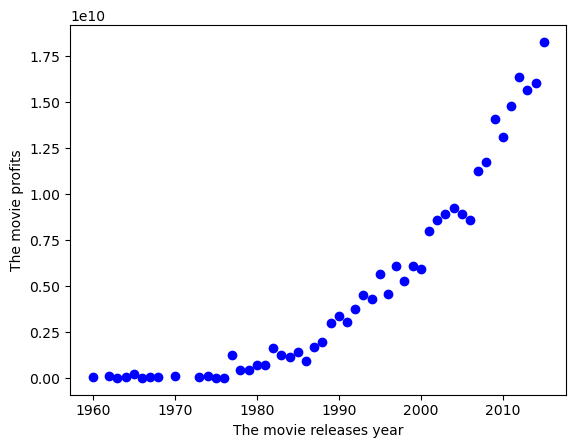

In [61]:

plt.scatter(mo_v2["The movie releases year"] , mo_v2["The movie profits"], c ="blue")
plt.xlabel("The movie releases year")
plt.ylabel("The movie profits")
plt.show()

#### The most recent years of release have seen an increase in profits.

#### The following snippet of code demonstrates the correlation between the length of a movie's run and its gross earnings.

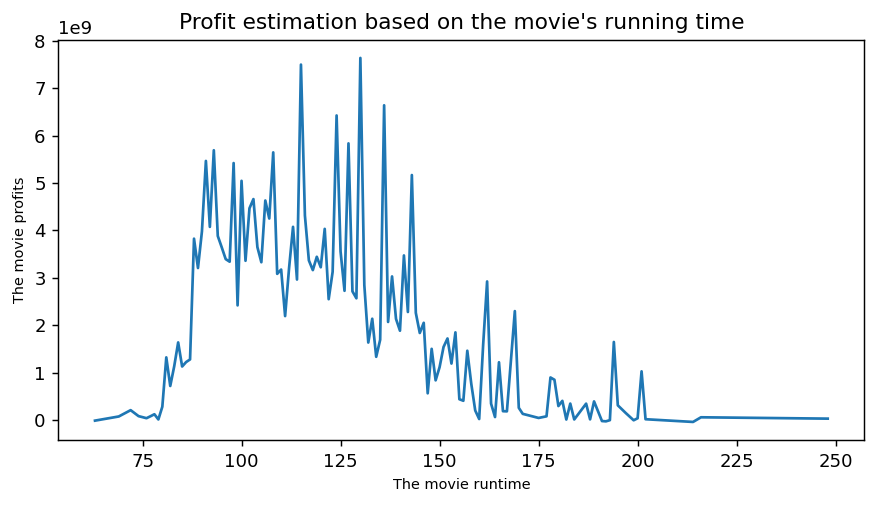

In [62]:
runtime_profit = new_data.groupby("runtime")["profit"].sum()
plt.figure(figsize=(8,4), dpi = 130)

plt.xlabel('The movie runtime', fontsize = 8)
plt.ylabel('The movie profits', fontsize = 8)
plt.title("Profit estimation based on the movie's running time")
plt.plot(runtime_profit)
plt.show()

#### The most profitable length for movies is between (100 and 120) minutes.

### Research Question 6  (Where do we stand with the runtime statistics!)

In [63]:
new_data["runtime"].describe()

count    2534.000000
mean      112.012628
std        20.066978
min        63.000000
25%        98.000000
50%       108.000000
75%       123.000000
max       248.000000
Name: runtime, dtype: float64

#### Notes :

1- 25 percent of all films that are shorter than 98 minutes.

2- Fifty percent of films that are shorter than 108 minutes.

3-75 percent of all films that are shorter than 123 minutes.

4- The average length of the show is 112 minutes.


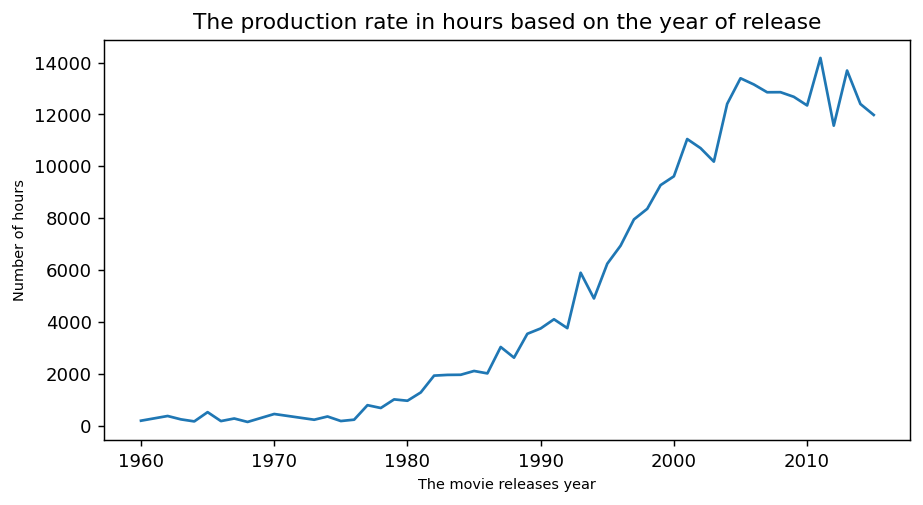

In [64]:
year_profit = new_data.groupby("release_year")["runtime"].sum()
plt.figure(figsize=(8,4), dpi = 130)
plt.xlabel('The movie releases year', fontsize = 8)
plt.ylabel('Number of hours', fontsize = 8)
plt.title('The production rate in hours based on the year of release')
plt.plot(year_profit)
plt.show()


#### In recent years, the number of hours produced has led to an increase in film production.

### Research Question 7  (What about the average values for (revenue, budget, profit, and runtime)!)

#### I'm going to write a function that finds the column average and displays it.

In [65]:
def avg(column):
    return int(np.mean(new_data[column]))

In [66]:
avg("budget")

52146725

In [67]:
avg("profit")

100095427

In [68]:
avg("revenue")

152242152

In [69]:
avg("runtime")

112

#### Notes :

1 The average spending plan is 52,146,725 dollars.

2 The average amount of profit is 100,095,427 dollars.

3 The average length of the show is 112 minutes.

4 The average amount of revenue is 152,242,152 dollars.


### Research Question 8  (What about the maximum and minimum values for (runtime), (budget), (profit), and (revenue), respectively!)

#### I'm going to write a function that looks up the highest and lowest possible values for a column and then displays them.

In [70]:
def max_min(column):
    max_value = new_data[column].idxmax()
    max_value_v1 = pd.DataFrame(new_data.loc[max_value])
    min_value = new_data[column].idxmin()
    min_value_v1 = pd.DataFrame(new_data.loc[min_value])
    
    all_values = pd.concat([max_value_v1, min_value_v1], axis = 1)
    
    return all_values

#### The following are the calculations regarding profit.

In [71]:
max_min("profit")

1386  \
budget                                                        237000000   
revenue                                                      2781505847   
profit                                                       2544505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_average                                                        7.1   
release_year                                                       2009   

                                                                   2244  
budget                                                        425000000  
revenue                                                        11087569  
profit                                                       -413912431  
original_title                                        The Warrior's Way  
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                                     Sngmoo Lee  
runtime                                                             100  
genres                        Adventure|Fantasy|Action|Western|Thriller  
production_companies                           Boram Entertainment Inc.  
release_date                                        2010-12-02 00:00:00  
vote_average                                                        6.4  
release_year                                                       2010

#### 1- The highest possible profit is 2,544,505,847 dollars.

####  2- The minimum amount of profit is $ 413,912,431.

#### The following are the calculations regarding runtime.

In [72]:
max_min("runtime")

10443  \
budget                                                         31115000   
revenue                                                        57750000   
profit                                                         26635000   
original_title                                                Cleopatra   
cast                  Elizabeth Taylor|Richard Burton|Rex Harrison|R...   
director              Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...   
runtime                                                             248   
genres                                            Drama|History|Romance   
production_companies  Twentieth Century Fox Film Corporation|MCL Fil...   
release_date                                        2063-06-12 00:00:00   
vote_average                                                        6.3   
release_year                                                       1963   

                                                                  3424   
budget                                                         30000000  
revenue                                                        14460000  
profit                                                        -15540000  
original_title                                          Winnie the Pooh  
cast                  Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...  
director                                      Stephen Anderson|Don Hall  
runtime                                                              63  
genres                                                 Animation|Family  
production_companies  Walt Disney Pictures|Walt Disney Animation Stu...  
release_date                                        2011-04-13 00:00:00  
vote_average                                                        6.8  
release_year                                                       2011

#### 1- There are a total of 248 minutes in The Max.

#### 2- The duration of the Min is sixty-three minutes.

#### The following are the calculations regarding revenue.

In [73]:
max_min("revenue")

1386  \
budget                                                        237000000   
revenue                                                      2781505847   
profit                                                       2544505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_average                                                        7.1   
release_year                                                       2009   

                                                                   4017  
budget                                                         21000000  
revenue                                                        10011050  
profit                                                        -10988950  
original_title                                           Moonlight Mile  
cast                  Jake Gyllenhaal|Dustin Hoffman|Susan Sarandon|...  
director                                                Brad Silberling  
runtime                                                             117  
genres                                                    Romance|Drama  
production_companies  Punch Productions|Touchstone Pictures|Hyde Par...  
release_date                                        2002-09-09 00:00:00  
vote_average                                                        6.6  
release_year                                                       2002

#### The total revenue for Max comes to 2,781,505,847 dollars.

#### The minimum revenue required is 10,011,050 dollars.

#### The following are the calculations regarding budget.

In [74]:
max_min("budget")

2244  \
budget                                                        425000000   
revenue                                                        11087569   
profit                                                       -413912431   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                                     Sngmoo Lee   
runtime                                                             100   
genres                        Adventure|Fantasy|Action|Western|Thriller   
production_companies                           Boram Entertainment Inc.   
release_date                                        2010-12-02 00:00:00   
vote_average                                                        6.4   
release_year                                                       2010   

                                                                   7476  
budget                                                         10200000  
revenue                                                        35619521  
profit                                                         25419521  
original_title                                          Hostel: Part II  
cast                  Lauren German|Bijou Phillips|Heather Matarazzo...  
director                                                       Eli Roth  
runtime                                                              93  
genres                                                           Horror  
production_companies    Lions Gate Films|Next Entertainment|Screen Gems  
release_date                                        2007-06-08 00:00:00  
vote_average                                                        5.6  
release_year                                                       2007

#### The maximum budget allowed is 42,500,000 dollars.

#### The minimum budget is set at 10,200,000 dollars.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Results : Our findings indicate that

1-	 The profit has risen with the most recent releases

2-	 Films between 100 and 120 minutes long make the most money.

3-	50% of films make more than $100,094,277 in profit.

4-	Robert De Niro is the top actor, with 47 films to his credit.

5-	Steven Spielberg is the top director with 25 movies.

6-	 Warner Bros. is the leading production firm (in terms of the quantity of films) with 283 films.

7-	Drama has 1054 films, making it the most popular movie genre.


## Limitation :

1-	This data set contains information about 10000 movies collected from The Movie Database (TMDb), including user ratings and revenue for movies, but there is missing data and zero values for many rows, so in this report I take all movies that profit more than 10,000,000 $ to reduce errors in analysis due to missing values, so the results may be affected by deleted movies during the data cleaning process.

2-	Because this is a descriptive study and not an inferential one, it follows that I will not be conducting any experiments based on the results of this data collection; as a result, there may be some fluctuations in the results due to the fact that some data has been omitted.

3-	I do not have a lot of information regarding popularity, such as how the number is determined. For instance, it is connected to total sales or the average number of votes submitted.